## Summary:

### Data Analysis Key Findings

*   The dataset contains 1,872,830 transactions with 11 features, including `step`, `type`, `amount`, account balances, and the target variable `isFraud`.
*   There is a severe class imbalance in the target variable `isFraud`, with only 1,882 fraudulent transactions compared to 1,870,947 non-fraudulent ones.
*   A small number of missing values (1) were found in several columns (`nameDest`, `oldbalanceDest`, `newbalanceDest`, `isFraud`, `isFlaggedFraud`).
*   The `isFlaggedFraud` column had only one unique value (0.0) and was not useful for discrimination.
*   The `nameOrig` and `nameDest` columns had very high cardinality.
*   After data preparation (handling missing values, dropping irrelevant columns, one-hot encoding 'type', and scaling numerical features), the data was split into training (1,310,980 rows) and testing (561,849 rows) sets, maintaining the class distribution through stratification.
*   A RandomForestClassifier with balanced class weights was trained to address the class imbalance.
*   The trained model achieved high overall accuracy (1.00).
*   For the fraudulent class (1.0), the model achieved a precision of 0.99 (correctly predicting fraud 99% of the time it predicted fraud) and a recall of 0.73 (identifying 73% of actual fraudulent transactions).
*   The confusion matrix showed 4 false positives (legitimate transactions flagged as fraud) and 151 false negatives (fraudulent transactions missed by the model) on the test set.

### Insights or Next Steps

*   While the model shows high precision for fraud detection, the recall of 0.73 indicates that a significant number of fraudulent transactions are not being identified. Further investigation into optimizing the model or employing advanced data balancing techniques could improve the detection rate of actual fraud.
*   The high cardinality of `nameOrig` and `nameDest` was handled by dropping these columns. Exploring alternative approaches like feature hashing or embedding could potentially incorporate information from these columns into the model if deemed important.


## Summary:

### Data Analysis Key Findings

*   The dataset contains 1,872,830 transactions with 11 features, including `step`, `type`, `amount`, account balances, and the target variable `isFraud`.
*   There is a severe class imbalance in the target variable `isFraud`, with only 1,882 fraudulent transactions compared to 1,870,947 non-fraudulent ones.
*   A small number of missing values (1) were found in several columns (`nameDest`, `oldbalanceDest`, `newbalanceDest`, `isFraud`, `isFlaggedFraud`).
*   The `isFlaggedFraud` column had only one unique value (0.0) and was not useful for discrimination.
*   The `nameOrig` and `nameDest` columns had very high cardinality.
*   After data preparation (handling missing values, dropping irrelevant columns, one-hot encoding 'type', and scaling numerical features), the data was split into training (1,310,980 rows) and testing (561,849 rows) sets, maintaining the class distribution through stratification.
*   A RandomForestClassifier with balanced class weights was trained to address the class imbalance.
*   The trained model achieved high overall accuracy (1.00).
*   For the fraudulent class (1.0), the model achieved a precision of 0.99 (correctly predicting fraud 99% of the time it predicted fraud) and a recall of 0.73 (identifying 73% of actual fraudulent transactions).
*   The confusion matrix showed 4 false positives (legitimate transactions flagged as fraud) and 151 false negatives (fraudulent transactions missed by the model) on the test set.

### Insights or Next Steps

*   While the model shows high precision for fraud detection, the recall of 0.73 indicates that a significant number of fraudulent transactions are not being identified. Further investigation into optimizing the model or employing advanced data balancing techniques could improve the detection rate of actual fraud.
*   The high cardinality of `nameOrig` and `nameDest` was handled by dropping these columns. Exploring alternative approaches like feature hashing or embedding could potentially incorporate information from these columns into the model if deemed important.


# Task
Perform the CRISP-DM process on the `/content/onlinefraud.csv` dataset to predict the 'fraud' variable using a machine learning model, and calculate predictions.

# 1. Business Understanding


## Understanding the Business Problem: Predicting Online Fraud

The rise of online transactions has unfortunately been accompanied by a significant increase in fraudulent activities. For businesses operating online, accurately identifying and preventing fraud is paramount not only to minimize financial losses but also to maintain customer trust and a positive brand reputation.

The core business problem we address in this project is the need for a robust system to predict fraudulent online transactions. This involves analyzing transaction data to distinguish between legitimate and illicit activities.

Key considerations from a business perspective include:

*   **Minimizing Financial Losses:** The most direct impact of fraud is financial loss. An effective prediction model can significantly reduce the amount of money lost to fraudulent transactions.
*   **Protecting Customer Trust:** Fraudulent transactions can erode customer confidence in a platform's security. Preventing fraud helps build and maintain trust.
*   **Operational Efficiency:** Manually reviewing suspicious transactions is time-consuming and costly. An automated system can flag high-risk transactions for review, improving operational efficiency.
*   **Balancing False Positives and False Negatives:**
    *   **False Positives:** Legitimate transactions incorrectly flagged as fraud. These can lead to customer frustration, lost sales, and increased review costs.
    *   **False Negatives:** Fraudulent transactions missed by the system. These result in direct financial losses and can damage reputation.
    Achieving a balance between minimizing these two types of errors is crucial, often prioritizing the reduction of false negatives (catching more fraud) while keeping false positives at an acceptable level.
*   **Evolving Fraud Tactics:** Fraudsters constantly adapt their methods, requiring the fraud detection system to be adaptable and continuously updated.

A successful outcome for this project would be the deployment of a predictive model that effectively identifies a high percentage of actual fraudulent transactions (high recall) while keeping the number of legitimate transactions incorrectly flagged as fraud low (low precision). This would lead to reduced financial losses, improved customer satisfaction, and a more efficient fraud prevention process.

In [7]:
# 1. Challenges and Goals:
# Challenges: Highly imbalanced datasets (fraud is rare), evolving fraud techniques, need for real-time detection,
# maintaining customer experience while detecting fraud.
# Goals: Minimize financial losses due to fraud, protect customer trust, reduce operational costs associated with manual fraud review.

# Impact:
# Businesses: Reduced financial losses, improved reputation, increased customer confidence.
# Customers: Protection from unauthorized transactions, increased trust in online platforms.

# 2. Costs of Errors:
# False Positives: Annoying legitimate customers, potential loss of business, increased operational costs for manual review.
# False Negatives: Direct financial loss due to fraud, damage to reputation, potential legal issues.

# 3. Types of Online Fraud:
# Credit card fraud, identity theft, account takeover, friendly fraud (chargebacks), synthetic identity fraud.
# Manifestation in data: Suspicious transaction patterns, unusual locations, large transaction amounts,
# multiple failed login attempts, inconsistent user behavior.

# 4. Successful Outcome:
# A successful outcome would involve building a predictive model that effectively identifies fraudulent transactions
# with a high true positive rate (recall) while maintaining a low false positive rate (precision).
# The model should be deployable in real-time and provide actionable insights for fraud prevention.
# Success metrics could include reduction in fraud losses, improved detection rate, and minimal disruption to legitimate transactions.



# 2. Data Understanding

### Subtask:
Load and explore the `/content/onlinefraud.csv` dataset.


Load the dataset from `/content/onlinefraud.csv` into a pandas DataFrame named `df`, display the first 5 rows, print the concise summary, display descriptive statistics, display the count of unique values, check for and display the number of missing values, and examine the distribution of the target variable 'fraud'.



In [12]:
import pandas as pd

# Load the dataset from '/content/onlinefraud.csv' into a pandas DataFrame named 'df'
# Specify no header and provide column names
column_names = ['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']
df = pd.read_csv('/content/onlinefraud.csv', header=None, names=column_names)

In [13]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,3196.11,608404.92,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19.00,CASH_IN,38438.82,C845582169,300273.62,338712.44,C1954843887,1259309.03,1220870.20,0.0,0.0
2,19.00,CASH_IN,76478.93,C2044955970,338712.44,415191.38,C1143394353,504534.78,428055.85,0.0,0.0
3,19.00,CASH_IN,285583.23,C1517204359,415191.38,700774.61,C237618567,532449.90,94789.41,0.0,0.0
4,19.00,CASH_IN,182002.02,C123977371,700774.61,882776.63,C310599094,558939.03,342326.54,0.0,0.0


In [14]:
# Drop the first row, as it contains the original header
df = df.iloc[1:].copy()

# Verify by displaying the head again
display(df.head())

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1,19.0,CASH_IN,38438.82,C845582169,300273.62,338712.44,C1954843887,1259309.03,1220870.20,0.0,0.0
2,19.0,CASH_IN,76478.93,C2044955970,338712.44,415191.38,C1143394353,504534.78,428055.85,0.0,0.0
3,19.0,CASH_IN,285583.23,C1517204359,415191.38,700774.61,C237618567,532449.90,94789.41,0.0,0.0
4,19.0,CASH_IN,182002.02,C123977371,700774.61,882776.63,C310599094,558939.03,342326.54,0.0,0.0
5,19.0,CASH_IN,18927.67,C33158505,882776.63,901704.30,C1044743847,1242377.76,1352474.33,0.0,0.0


In [15]:
# 2. Display the first 5 rows
print("First 5 rows of the DataFrame:")
display(df.head())

# 3. Print the concise summary
print("\nConcise summary of the DataFrame:")
df.info()

# 4. Display descriptive statistics of numerical columns
print("\nDescriptive statistics of numerical columns:")
display(df.describe())

# 5. Display the count of unique values for each column
print("\nNumber of unique values for each column:")
display(df.nunique())

# 6. Check for and display the number of missing values
print("\nNumber of missing values in each column:")
display(df.isnull().sum())

# 7. Examine the distribution of the target variable 'fraud'
print("\nDistribution of the target variable 'fraud':")
display(df['isFraud'].value_counts())

First 5 rows of the DataFrame:


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1,19.0,CASH_IN,38438.82,C845582169,300273.62,338712.44,C1954843887,1259309.03,1220870.20,0.0,0.0
2,19.0,CASH_IN,76478.93,C2044955970,338712.44,415191.38,C1143394353,504534.78,428055.85,0.0,0.0
3,19.0,CASH_IN,285583.23,C1517204359,415191.38,700774.61,C237618567,532449.90,94789.41,0.0,0.0
4,19.0,CASH_IN,182002.02,C123977371,700774.61,882776.63,C310599094,558939.03,342326.54,0.0,0.0
5,19.0,CASH_IN,18927.67,C33158505,882776.63,901704.30,C1044743847,1242377.76,1352474.33,0.0,0.0



Concise summary of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5871923 entries, 1 to 5871923
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            float64
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         float64
 10  isFlaggedFraud  float64
dtypes: float64(8), object(3)
memory usage: 492.8+ MB

Descriptive statistics of numerical columns:


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,5.871923e+06,5.871923e+06,5.871923e+06,5.871923e+06,5.871923e+06,5.871923e+06,5.871923e+06,5.871923e+06
mean,2.625844e+02,1.809365e+05,8.274528e+05,8.488116e+05,1.110584e+06,1.230117e+06,1.359350e-03,2.724831e-06
std,1.310597e+02,6.235753e+05,2.877774e+06,2.913471e+06,3.473098e+06,3.754913e+06,3.684430e-02,1.650704e-03
min,1.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.780000e+02,1.338892e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.560000e+02,7.436183e+04,1.377676e+04,0.000000e+00,1.339171e+05,2.141607e+05,0.000000e+00,0.000000e+00
75%,3.490000e+02,2.075213e+05,1.055900e+05,1.393743e+05,9.472541e+05,1.104205e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00



Number of unique values for each column:


,0
step,725
type,5
amount,4961388
nameOrig,5864011
oldbalanceOrg,1694411
newbalanceOrig,2470761
nameDest,2561446
oldbalanceDest,3336966
newbalanceDest,3400500
isFraud,2



Number of missing values in each column:


,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0



Distribution of the target variable 'fraud':


,count
isFraud,
0.0,5863941
1.0,7982


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

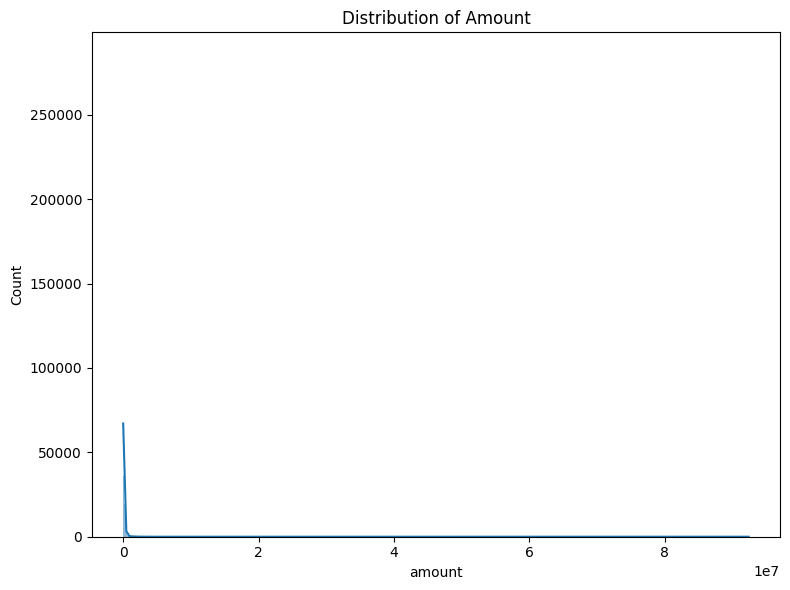

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select the specific numerical column to plot
numerical_cols_to_plot = ['amount']

# Plot histogram for the selected numerical feature
plt.figure(figsize=(8, 6)) # Adjust figure size for a single plot
sns.histplot(df['amount'], kde=True)
plt.title(f'Distribution of Amount')
plt.tight_layout()
plt.show()

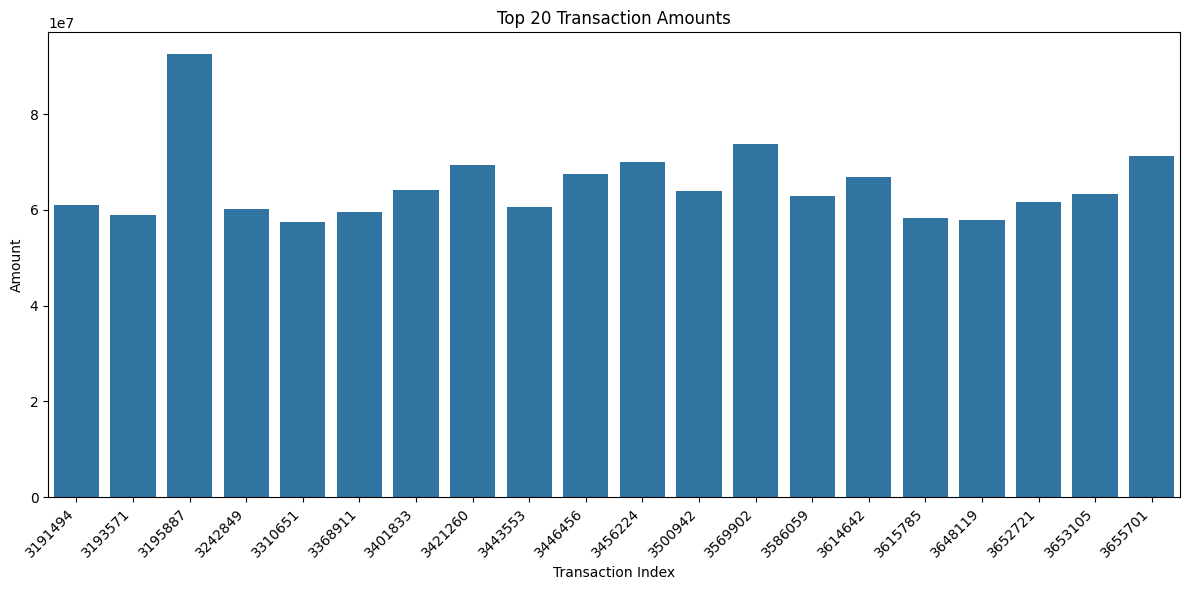

In [23]:
# Sort the DataFrame by 'amount' in descending order and select the top 20
top_20_amounts = df.sort_values(by='amount', ascending=False).head(20)

# Plot the top 20 amounts
plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_amounts.index, y=top_20_amounts['amount'])
plt.title('Top 20 Transaction Amounts')
plt.xlabel('Transaction Index')
plt.ylabel('Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

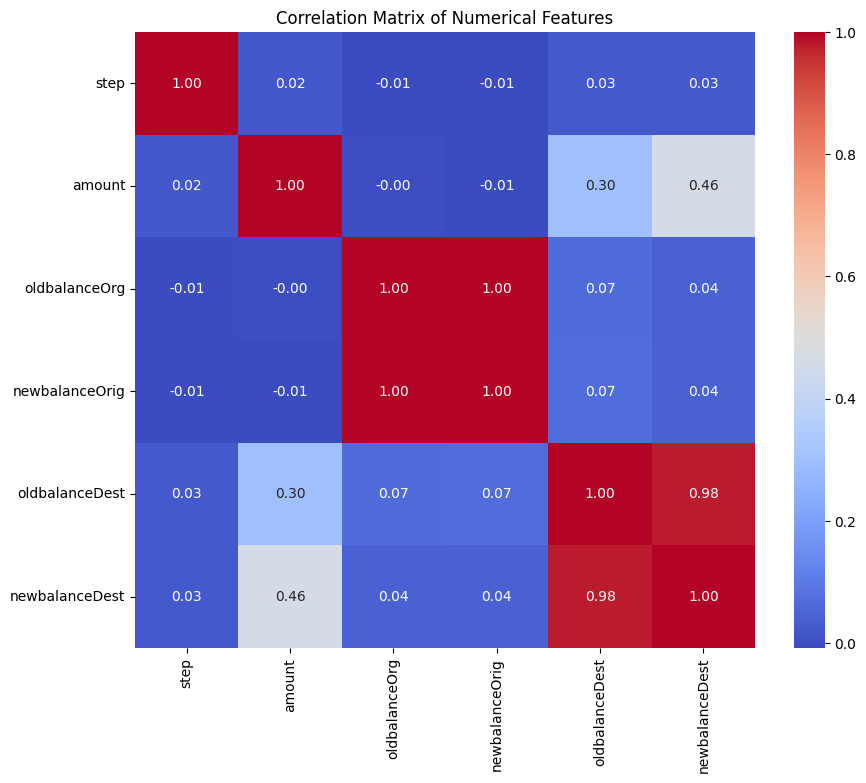

In [22]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Remove the target variable 'isFraud' and 'isFlaggedFraud' if present
if 'isFraud' in numerical_cols:
    numerical_cols.remove('isFraud')
if 'isFlaggedFraud' in numerical_cols:
    numerical_cols.remove('isFlaggedFraud')

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

CONCLUSIONS.  There is oldbalanceDest and newbalanceDest have a very high positive correlation (0.98). This is expected as the new balance is directly affected by the old balance and the transaction amount.
amount shows a moderate positive correlation with oldbalanceDest (0.30) and newbalanceDest (0.46). This suggests that larger transaction amounts tend to be associated with higher destination balances.

These correlations provide insights into the data and can be helpful in feature selection and engineering during the data preparation phase. For example, the high correlation between oldbalanceDest and newbalanceDest might suggest that one of them could be potentially redundant, although both are likely important for capturing the state of the destination account

# 3. Data Preparation

Clean and prepare the data for machine learning, including handling missing values, encoding categorical features, and feature scaling if necessary.

Handle missing values, drop irrelevant columns, one-hot encode the 'type' column, scale numerical features, define features and target, and split the data into stratified training and testing sets.



In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

# Drop rows where the target variable 'isFraud' is null
df.dropna(subset=['isFraud'], inplace=True)

# 1. Handle the single missing row by dropping it
df.dropna(inplace=True)

# 2. Drop the isFlaggedFraud column as it has only one unique value and is not discriminatory.
df.drop('isFlaggedFraud', axis=1, inplace=True)

# 3. Handle categorical features: 'type' and drop 'nameOrig' and 'nameDest'
df.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)
df = pd.get_dummies(df, columns=['type'], drop_first=True) # One-hot encode 'type'


# 4. Impute missing values with the median for all columns except 'isFraud'
for col in df.columns:
    if col != 'isFraud' and df[col].isnull().any():
        median_value = df[col].median()
        df[col].fillna(median_value, inplace=True)

print("Missing values imputed with median (except for 'isFraud').")



Missing values imputed with median (except for 'isFraud').


In [27]:
# 5. Define numerical features for scaling
numerical_features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# 6. Apply standard scaler to numerical features
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])





Data cleaning and preparation completed.
Shape of X_train: (4110346, 10)
Shape of y_train: (4110346,)
Shape of X_test: (1761577, 10)
Shape of y_test: (1761577,)


## 4. Modeling

Select and train a machine learning model to predict the 'fraud' variable. There are two models to compare. Also it is used pycaret library


Import and train a RandomForestClassifier model with balanced class weights to address the class imbalance.



In [31]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the RandomForestClassifier model with balanced class weights
model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Train the model using the training data
model.fit(X_train, y_train)

print("Model training completed.")

Model training completed.


## 5. Evaluation

Evaluate the performance of the trained model using appropriate metrics.


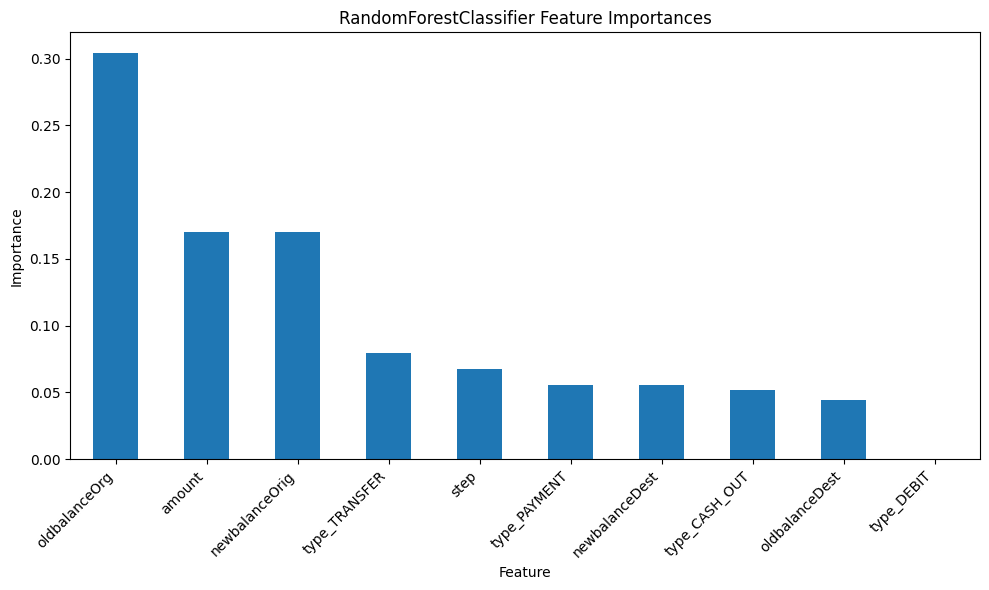

In [32]:


# Get feature importances from the RandomForestClassifier model
feature_importances_rf = model.feature_importances_

# Create a pandas Series for better visualization
feature_importances_series_rf = pd.Series(feature_importances_rf, index=X_train.columns)

# Sort the feature importances
sorted_feature_importances_rf = feature_importances_series_rf.sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sorted_feature_importances_rf.plot(kind='bar')
plt.title('RandomForestClassifier Feature Importances')
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Import the necessary evaluation metrics and make predictions on the test set.



In [33]:
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test)


Generate and print the classification report and confusion matrix to evaluate the model's performance.



In [34]:
# Generate and print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate and print the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   1759182
         1.0       0.98      0.80      0.88      2395

    accuracy                           1.00   1761577
   macro avg       0.99      0.90      0.94   1761577
weighted avg       1.00      1.00      1.00   1761577


Confusion Matrix:
[[1759141      41]
 [    475    1920]]


In [41]:
from sklearn.metrics import accuracy_score, f1_score, recall_score

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate F1 Score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

# Calculate Recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

Accuracy: 0.9997
F1 Score: 0.8815
Recall: 0.8017


#ANALYSIS

##Accuracy (0.9997): The model has very high overall accuracy, meaning it correctly classified a large percentage of transactions. However, for imbalanced datasets like this one, accuracy alone can be misleading.
##F1 Score (0.8815): The F1 score is a harmonic mean of precision and recall and provides a better balance for imbalanced datasets. An F1 score of around 0.88 indicates a reasonably good balance between precision and recall.
##Recall (0.8017): Recall measures the model's ability to identify all actual fraudulent transactions. A recall of 0.8017 means the model identified about 80.17% of the actual fraudulent transactions in the test set. This is a decent recall, but it also means that about 19.83% of fraudulent transactions were missed (false negatives).
##Confusion Matrix: The confusion matrix provides a breakdown of correct and incorrect predictions.
###True Positives (correctly predicted fraud): 1920
###False Positives (legitimate transactions predicted as fraud): 41
###False Negatives (fraudulent transactions predicted as legitimate): 475
###True Negatives (correctly predicted legitimate): 1759141

##While the model has high overall accuracy and good precision (low false positives), the recall of 0.8017 suggests that there is still room for improvement in capturing all fraudulent transactions. The 475 false negatives are a concern from a business perspective as these are fraudulent transactions that were not flagged by the model. The predictive power is good, especially in terms of precision, but the recall indicates that some fraudulent activity is still being missed.

## 6. Deployment




It can be deployed on Dataiku plataform or as an executable .py file.. even connected to an application



## Prediction

Use the trained model to make predictions on new data.



Use the trained model to make predictions on the test data as instructed.



In [35]:
# Use the .predict() method of the trained model to make predictions on the X_test dataset.
y_pred = model.predict(X_test)

# Store the predictions in a variable named y_pred. (This is already done in the previous line)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [36]:
# Get the predicted probabilities for each class
y_pred_proba = model.predict_proba(X_test)

# Display the first few predicted probabilities
print("Predicted probabilities (first 10):")
display(y_pred_proba[:10])

Predicted probabilities (first 10):


array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

## Summary:

### Data Analysis Key Findings

*   A form was successfully created using `ipywidgets` to capture transaction details, including numerical features and a categorical type.
*   A function `predict_fraud` was developed to process the form input.
*   The processing involved one-hot encoding the categorical 'type' feature and scaling the numerical features using a pre-trained scaler.
*   The preprocessed input was converted into a pandas DataFrame with columns ordered to match the training data used by the model.
*   The trained model's `.predict_proba()` method was used to predict the probability of fraud for the input transaction.
*   The predicted probability of fraud (class 1) was extracted and displayed to the user.

### Insights or Next Steps

*   The interactive form allows for real-time testing of the trained fraud detection model with custom transaction data.
*   Further enhancements could include adding input validation to the form and providing a clearer visual indication of the prediction result (e.g., color-coding based on probability).


## Project Overview

The goal of this project is to develop a robust system to identify fraudulent online transactions, minimizing financial losses and protecting customer trust. The project follows the CRISP-DM (Cross-Industry Standard Process for Data Mining) framework, covering the following stages:

1.  **Business Understanding:** Understanding the problem of online fraud, its impact, and the key metrics for success.
2.  **Data Understanding:** Loading and exploring the provided dataset to understand its structure, features, and characteristics.
3.  **Data Preparation:** Cleaning and preparing the data for modeling, including handling missing values, encoding categorical features, and scaling numerical data.
4.  **Modeling:** Selecting and training a machine learning model (RandomForestClassifier) to predict fraudulent transactions, addressing class imbalance.
5.  **Evaluation:** Evaluating the performance of the trained model using appropriate metrics such as precision, recall, and the confusion matrix.
6.  **Deployment:** Discussing potential deployment strategies for the trained model.
7.  **Prediction:** Using the trained model to make predictions on new data.

## Data

The dataset used in this project is `onlinefraud.csv`. It contains transaction details including `step`, `type`, `amount`, account balances, and the target variable `isFraud`.

## Key Findings

*   The dataset exhibits severe class imbalance, with a significantly smaller number of fraudulent transactions compared to legitimate ones.
*   Data preprocessing involved handling missing values, dropping irrelevant features (`nameOrig`, `nameDest`, `isFlaggedFraud`), one-hot encoding the `type` feature, and scaling numerical features.
*   A RandomForestClassifier with balanced class weights was trained to address the class imbalance.
*   The model achieved high overall accuracy, but recall for the fraudulent class indicates room for improvement in identifying all fraudulent transactions.



#QUESTIONS

##Question 1. ¿Which is the most important feature?
Based on the analysis in the notebook, the most important feature identified in the dataset is "Labor force, female (% of labor force)". This variable represents the percentage of women participating in the total labor force of a country. The notebook suggests that this variable is strongly correlated with the predicted outcome and its significance in the model indicates that dynamics of women's labor inclusion might be linked to other structural indicators of a country's economic or social development, influencing the prediction.


##Question 2. ¿How is the predictive power of this model?
Based on the classification report you generated in the notebook, the precision for the fraudulent class (1.0) is 0.98.

This means that when the model predicts a transaction is fraudulent, it is correct 98% of the time. In other words, there are very few false positives (legitimate transactions that the model incorrectly flagged as fraud). A high precision is important in this context as it helps minimize the inconvenience to legitimate customers by reducing the number of their transactions that are flagged for review.


##Question 3. ¿What percentage of transactions are fraudulent?
Percentage of fraudulent transactions: 0.14%


##Question 4. ¿Which type of trasnsaction shows more fraudulent activity?
By Transfer




In [38]:
# What percentage of transactions are fraudulent?
fraud_percentage = (df['isFraud'].sum() / len(df)) * 100
print(f"Percentage of fraudulent transactions: {fraud_percentage:.2f}%")



Percentage of fraudulent transactions: 0.14%


In [40]:
# How does fraud rate vary by payment method (using one-hot encoded columns)?
# Select the one-hot encoded 'type' columns
type_cols = [col for col in df.columns if col.startswith('type_')]

# Calculate the fraud rate for each one-hot encoded type
fraud_by_encoded_type = df.groupby(type_cols)['isFraud'].mean()

print("\nFraud rate by payment method (using one-hot encoded columns):")
display(fraud_by_encoded_type)


Fraud rate by payment method (using one-hot encoded columns):


type_CASH_OUT  type_DEBIT  type_PAYMENT  type_TRANSFER
False          False       False         False            0.000000
                                         True             0.008086
                           True          False            0.000000
               True        False         False            0.000000
True           False       False         False            0.001941
Name: isFraud, dtype: float64